In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load CSV (important: encoding needed)
df = pd.read_csv('/content/sample_data/data.csv.zip', encoding='latin1')

# Extract NO2 column
x = df['no2'].dropna().values

print("Number of NO2 samples:", len(x))

/tmp/ipython-input-1565102877.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/data.csv.zip', encoding='latin1')


Number of NO2 samples: 419509


In [3]:
r = 102316119

ar = 0.05 * (r % 7)
br = 0.3 * (r % 5 + 1)

print("ar =", ar)
print("br =", br)

ar = 0.15000000000000002
br = 1.5


In [4]:
z = x + ar * np.sin(br * x)

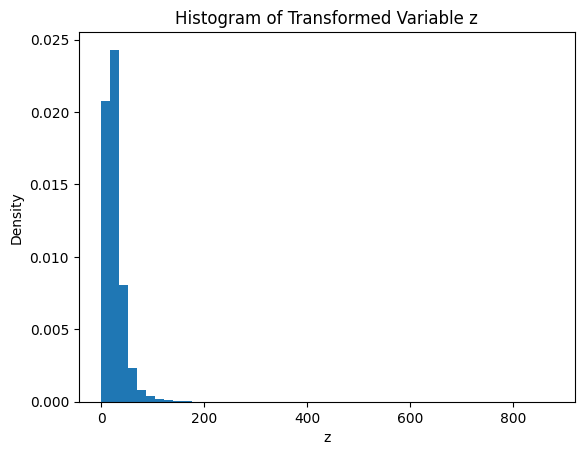

In [5]:
plt.hist(z, bins=50, density=True)
plt.xlabel("z")
plt.ylabel("Density")
plt.title("Histogram of Transformed Variable z")
plt.show()

In [6]:
mu = np.mean(z)
mu

np.float64(25.814687284943872)

In [7]:
sigma = np.std(z)
lam = 1 / (2 * sigma**2)
lam

np.float64(0.0014612298133120176)

In [8]:
c = np.sqrt(lam / np.pi)
c

np.float64(0.021566731221112533)

In [9]:
print("FINAL PARAMETER VALUES")
print("μ (mu)     =", mu)
print("λ (lambda) =", lam)
print("c          =", c)

FINAL PARAMETER VALUES
μ (mu)     = 25.814687284943872
λ (lambda) = 0.0014612298133120176
c          = 0.021566731221112533


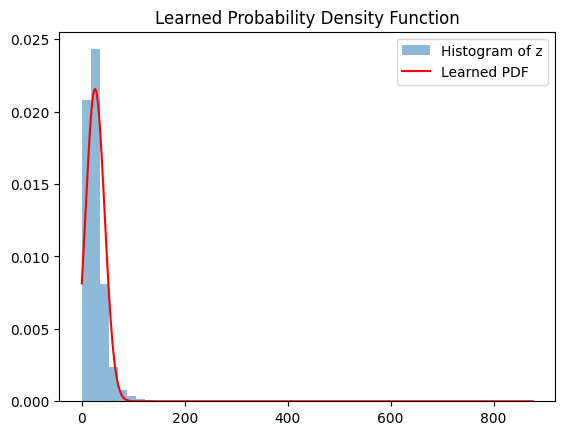

In [10]:
z_vals = np.linspace(min(z), max(z), 500)
pdf = c * np.exp(-lam * (z_vals - mu)**2)

plt.hist(z, bins=50, density=True, alpha=0.5, label='Histogram of z')
plt.plot(z_vals, pdf, 'r', label='Learned PDF')
plt.legend()
plt.title("Learned Probability Density Function")
plt.show()